In [ ]:
__nbid__ = '0013'
__author__ = 'Yumi Choi <yumi.choi@noirlab.edu>', 'David Herrera <david.herrera@noirlab.edu>', 'Astro Data Lab Team <datalab@noirlab.edu>'
__version__ = '20251205' 
__datasets__ = ['phat_v2']  
__keywords__ = ['M31', 'stars', 'plot:cmd', 'plot:sed', 'interactive plot']

# Explorando Poblaciones Estelares Resueltas en M31 con PHAT

*Yumi Choi & el Equipo de Astro Data Lab*

#### (_Traducción de [M31_resolved_stellar_pops.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/ExploringM31/M31_resolved_stellar_pops.ipynb)_)

### Tabla de contenido
* [Objetivos y Resumen](#goals)
* [Avisos legales y atribuciones](#attribution)
* [Importaciones y configuración](#import)
* [Autenticación](#auth)
* [Explorar la tabla principal de objetos PHAT](#exploreTable)
* [Hacer mapas Healpix del número de bloque, estrellas MS y RGB](#chapter1)
* [Variación en poblaciones estelares y calidad fotométrica a través del disco de M31](#chapter2)
* [Recursos y referencias](#resources)

<a class="anchor" id="goals"></a>
# Objetivos
* Aprender cómo usar una consulta SQL para hacer mapas Healpix del número de bloque de PHAT así como de poblaciones estelares jóvenes y viejas
* Aprender cómo recuperar datos para cada bloque y graficar diagramas color-magnitud y distribución espectral de banda ancha para estrellas individuales
* Explorar cómo varían las poblaciones estelares y la calidad fotométrica a través del disco de M31

# Resumen
Nuestra propia galaxia, la Vía Láctea (MW), proporciona vistas detalladas de procesos astrofísicos, afianzando gran parte de nuestra comprensión sobre la formación y evolución de galaxias. Sin embargo, debido a que observamos la MW mientras residimos en ella, nuestras observaciones sufren de complicaciones que surgen por el enrojecimiento en la línea de visión, distancias inciertas y confusión entre fondo/primer plano. Estudiar galaxias externas en su lugar, que están libres de estos efectos de proyección, ofrece una vista mucho más limpia de una galaxia completa. La galaxia masiva más cercana a la MW, la galaxia de Andrómeda (también conocida como M31) proporciona un laboratorio excelente, ya que su proximidad aún nos permite resolver sus estrellas individuales pero está lo suficientemente lejos como para observar la galaxia completa. Además, M31 contiene una amplia gama de entornos locales que consisten en poblaciones estelares jóvenes y viejas. También tiene varias estructuras, incluidas brazos espirales, anillos de formación estelar, una barra y un bulbo.

El Panchromatic Hubble Andromeda Treasury (<a href="http://adsabs.harvard.edu/abs/2012ApJS..200...18D">PHAT</a>; PI Dalcanton) fue un programa de Hubble Space Telescope de múltiples ciclos para mapear aproximadamente un tercio del disco de formación estelar de M31, usando 6 filtros que cubren longitudes de onda desde el ultravioleta hasta el infrarrojo cercano.

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

<a class="anchor" id="import"></a>
# Importaciones y configuración

In [1]:
# Librerías estandar
from getpass import getpass
from itertools import cycle

# Librerías de 3ros # Eliminar importaciones que no son necesarias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import healpy as hp
import random

# Data Lab
from dl import authClient as ac, queryClient as qc

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

<a class="anchor" id="exploreTable"></a>
# Explorar la tabla principal de objetos PHAT
El notebook <a href="https://github.com/astro-datalab/notebooks-latest-es/blob/master/03_EjemplosDeCiencia/ExplorandoM31/M31ConPhat.ipynb">M31ConPhat.ipynb</a> listó las tablas disponibles en la base de datos PHAT. Este notebook usará la tabla principal de objetos PHAT, phat_v2.phot_mod, que contiene fotometría promedio combinada.

### Examinar las columnas de la tabla phat_v2.phot_mod

Primero, consulta 10 filas de phat_v2.phot_mod solo para obtener información básica de la tabla.

In [2]:
query = """SELECT *
           FROM phat_v2.phot_mod
           LIMIT 10
        """

Guarda el resultado de la consulta, que por omisión es una cadena con formato CSV, como un dataframe de Pandas.

In [3]:
df = qc.query(sql=query, fmt='pandas')
print("Número de columnas:",len(df.columns)) 
print("Lista de columnas:", df.columns)
df

Número de columnas: 93
Lista de columnas: Index(['ra', 'dec', 'elon', 'elat', 'glon', 'glat', 'field', 'brick', 'x', 'y',
       'f110w_rate', 'f110w_raterr', 'f110w_vega', 'f110w_err', 'f110w_chi',
       'f110w_snr', 'f110w_sharp', 'f110w_round', 'f110w_crowd', 'f160w_rate',
       'f160w_raterr', 'f160w_vega', 'f160w_err', 'f160w_chi', 'f160w_snr',
       'f160w_sharp', 'f160w_round', 'f160w_crowd', 'f275w_rate',
       'f275w_raterr', 'f275w_vega', 'f275w_err', 'f275w_chi', 'f275w_snr',
       'f275w_sharp', 'f275w_round', 'f275w_crowd', 'f336w_rate',
       'f336w_raterr', 'f336w_vega', 'f336w_err', 'f336w_chi', 'f336w_snr',
       'f336w_sharp', 'f336w_round', 'f336w_crowd', 'f475w_rate',
       'f475w_raterr', 'f475w_vega', 'f475w_err', 'f475w_chi', 'f475w_snr',
       'f475w_sharp', 'f475w_round', 'f475w_crowd', 'f814w_rate',
       'f814w_raterr', 'f814w_vega', 'f814w_err', 'f814w_chi', 'f814w_snr',
       'f814w_sharp', 'f814w_round', 'f814w_crowd', 'ir_x', 'ir_y',
       'f8

,ra,dec,elon,elat,glon,glat,field,brick,x,y,...,f110w_gst,f160w_gst,f110w_flag,f160w_flag,f275w_flag,f336w_flag,f475w_flag,f814w_flag,objid,objid_uniq
0,10.589976,41.239578,27.757463,33.356157,121.096626,-21.599817,18,1,1343.57,825.21,...,1,1,0,0,0,0,0,2,PHAT_10.5899756+41.239578,PHAT_10.5899756+41.239578_1_18
1,10.590045,41.239541,27.757498,33.356100,121.096681,-21.599856,18,1,1339.73,827.77,...,0,0,0,0,0,0,0,0,PHAT_10.5900453+41.239541,PHAT_10.5900453+41.239541_1_18
2,10.590913,41.239257,27.758029,33.355543,121.097370,-21.600165,18,1,1303.71,864.22,...,1,1,0,0,0,0,0,0,PHAT_10.5909126+41.239257,PHAT_10.5909126+41.239257_1_18
3,10.590441,41.239428,27.757749,33.355860,121.096996,-21.599981,18,1,1324.39,844.83,...,1,1,0,0,0,0,2,0,PHAT_10.5904411+41.239428,PHAT_10.5904411+41.239428_1_18
4,10.590257,41.239471,27.757627,33.355964,121.096849,-21.599932,18,1,1330.92,836.65,...,1,1,0,0,0,0,2,0,PHAT_10.5902568+41.239471,PHAT_10.5902568+41.239471_1_18
5,10.590228,41.239511,27.757626,33.356009,121.096827,-21.599892,18,1,1334.15,836.21,...,1,1,0,0,2,0,2,0,PHAT_10.5902278+41.239511,PHAT_10.5902278+41.239511_1_18
6,10.590301,41.239488,27.757671,33.355963,121.096885,-21.599917,18,1,1331.18,839.29,...,0,0,0,0,0,0,2,0,PHAT_10.5903006+41.239488,PHAT_10.5903006+41.239488_1_18
7,10.590101,41.239528,27.757535,33.356069,121.096725,-21.599871,18,1,1337.79,830.23,...,1,1,0,0,0,0,0,0,PHAT_10.5901006+41.239528,PHAT_10.5901006+41.239528_1_18
8,10.590128,41.239560,27.757574,33.356087,121.096748,-21.599840,18,1,1339.38,832.43,...,1,0,0,0,0,0,0,0,PHAT_10.5901279+41.239560,PHAT_10.5901279+41.239560_1_18
9,10.590395,41.239444,27.757722,33.355891,121.096960,-21.599963,18,1,1326.41,842.93,...,1,1,0,0,2,0,0,0,PHAT_10.5903950+41.239444,PHAT_10.5903950+41.239444_1_18


<a class="anchor" id="chapter1"></a>
# Hacer mapas Healpix del número de bloque, estrellas de secuencia principal (MS) y de la rama gigante roja (RGB) 

PHAT dividió el área del survey en 23 bloques. Cada bloque consiste en un mosaico de 3$\times$6 de 18 apuntados de HST (<a href="http://adsabs.harvard.edu/abs/2012ApJS..200...18D">Dalcanton et al. (2012)</a>). 

Una de las columnas en la tabla de objetos PHAT, nest4096, es el índice Healpix (NSIDE=4096, esquema nested) para la AR y Dec del objeto. Healpix es una teselación práctica del cielo en teselas de igual área. Para hacer mapas de cantidades agregadas en PHAT, vamos a usar la base de datos para devolver resultados en una consulta agrupada por valor de índice Healpix. Luego podemos poner los resultados en arreglos y usar la funcionalidad de healpy para mostrar los mapas. 

En esta primera consulta, la cláusula GROUP BY le indica a la base de datos que agregue los resultados según los valores en la columna nest4096, y devuelva la AR y Dec promedio de los objetos en esos grupos, así como el valor nest4096 mismo y el conteo del número de objetos en el grupo. Aquí solo recuperamos estrellas MS azules y relativamente brillantes con buena calidad fotométrica. Los criterios de selección de color y magnitud para estrellas MS y RGB están motivados por la Figura 18 en <a href="https://ui.adsabs.harvard.edu/abs/2023ApJS..268...48W">Williams et al. (2023)</a>.  

In [4]:
query = """SELECT avg(ra) as ra0, avg(dec) as dec0, nest4096, count(nest4096) as nb, 
            avg(brick) as brick
           FROM phat_v2.phot_mod
           WHERE f475w_gst=1 AND f814w_gst=1 AND 
            f475w_vega-f814w_vega>-0.5 AND f475w_vega-f814w_vega<0.25 AND f814w_vega<24
           GROUP BY nest4096
          """

Guardar el resultado de la consulta de estrellas MS como un dataframe de Pandas.

In [5]:
df_MS = qc.query(sql=query, fmt='pandas') 
print("Número de filas:", len(df_MS))

Número de filas: 2511


Calcular el centro de la distribución de AR y Dec de los objetos

In [6]:
rarot, decrot = np.median(df_MS['ra0']), np.median(df_MS['dec0'])

### Mapa Healpix del número de bloque de PHAT 

Este mapa servirá más adelante para denotar ubicaciones con densidad estelar variable dentro del disco.

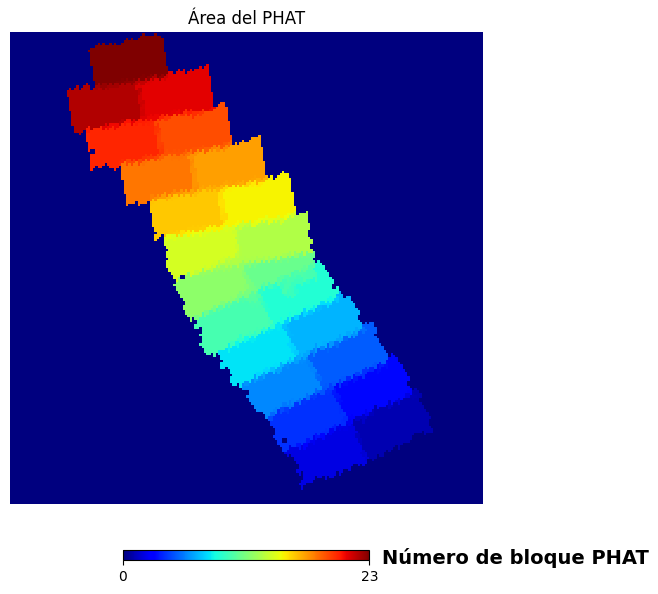

In [7]:
brickmap = np.zeros(hp.nside2npix(4096)) 
brickmap[df_MS['nest4096']] = df_MS['brick'] 
hp.gnomview(brickmap, title='Área del PHAT', reso=0.4, nest=True,
            rot=(rarot,decrot,0), notext=True, cmap='jet', unit='Número de bloque PHAT') 

### Mapa Healpix de estrellas MS 

Ahora estamos graficando la distribución de estrellas MS en M31.

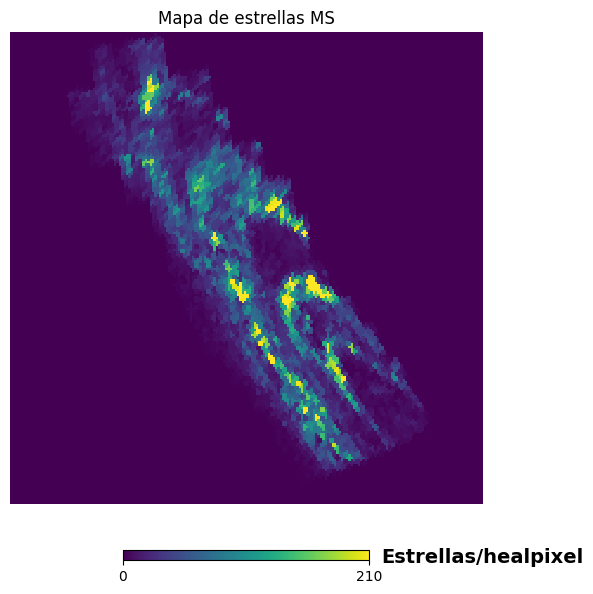

In [8]:
msmap = np.zeros(hp.nside2npix(4096)) 
msmap[df_MS['nest4096']] = df_MS['nb'] 
nmax = 0.5*msmap.max() # Fijar el valor máximo del rango a la mitad del valor máximo del mapa para mejorar la visualización 
hp.gnomview(msmap, title='Mapa de estrellas MS', notext=True, reso=0.4, nest=True, 
            rot=(rarot,decrot,0), unit='Estrellas/healpixel', max=nmax)

Las estrellas MS jóvenes están claramente agrupadas alrededor de los brazos espirales y el anillo de 10 kpc, donde tiene lugar la formación estelar reciente activa.

### Mapa Healpix de estrellas RGB 

La misma consulta que arriba, pero para estrellas RGB con buena calidad fotométrica. 

In [9]:
query = """SELECT nest4096, count(nest4096) as nb
           FROM phat_v2.phot_mod
           WHERE f110w_gst=1 AND f160w_gst=1 AND 
            f110w_vega-f160w_vega>0.75 AND f110w_vega-f160w_vega<2.0 AND 
            f160w_vega>18.5 AND f160w_vega<22.0
           GROUP BY nest4096
          """

Guardar el resultado de la consulta como un dataframe de Pandas.

In [10]:
df_RGB = qc.query(sql=query, fmt='pandas') 
print("Número de filas:", len(df_RGB))

Número de filas: 2571


Ahora estamos graficando la distribución de estrellas RGB en M31.

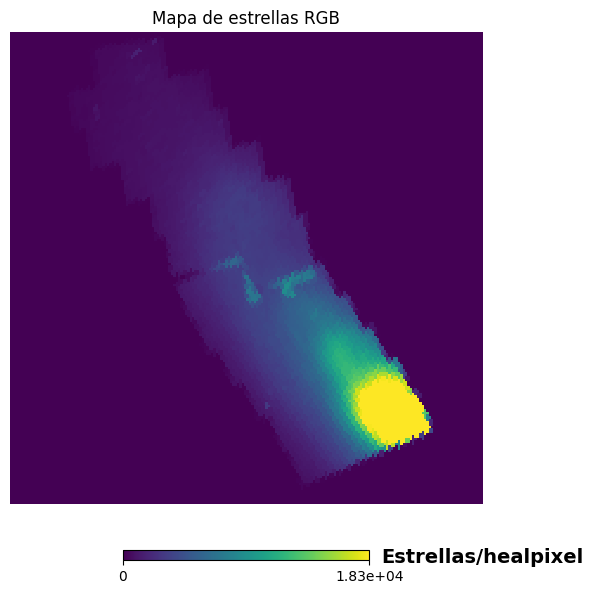

In [11]:
rgbmap = np.zeros(hp.nside2npix(4096))
rgbmap[df_RGB['nest4096']] = df_RGB['nb']
nmax = 0.5*rgbmap.max() # Fijar el valor máximo del rango a la mitad del valor máximo del mapa para mejorar la visualización 
hp.gnomview(rgbmap, title='Mapa de estrellas RGB', notext=True, reso=0.4, nest=True, 
            rot=(rarot,decrot,0), unit='Estrellas/healpixel', max=nmax)

Por el contrario a las estrellas de la secuencia principal (MS), las estrellas viejas de la rama gigante roja (RGB) muestran una distribución espacial más suave, siguiendo principalmente un perfil de densidad estelar descrito como una combinación de un disco exponencial y un bulbo.

<a class="anchor" id="chapter2"></a>
# Variación en las poblaciones estelares y calidad fotométrica a lo largo del disco de M31

Como se ve en los mapas de estrellas MS y RGB de arriba, la distribución espacial de las poblaciones estelares, así como la densidad numérica estelar, varían con su posición dentro del disco de la galaxia. La densidad numérica de estrellas RGB, que son dominantes en número, aumenta hacia el centro de M31. El "apelotonamiento" estelar se convierte en la fuente dominante de error en la fotometría del HST. El resto del notebook explorará cómo las poblaciones estelares y la calidad fotométrica cambian con la posición dentro del disco, observando múltiples diagramas color-magnitud (DCM) en ambientes representativos (Bloques 1, 15 y 23). También graficaremos distribuciones espectrales de energía (SEDs) de banda ancha estelares para estrellas seleccionadas aleatoriamente en cada ambiente.  

## Hacer la consulta para el Bloque 1 (región central más congestionada)

In [12]:
query = """SELECT f275w_vega, f336w_vega, f475w_vega, f814w_vega, f110w_vega, f160w_vega 
           FROM phat_v2.phot_mod
           WHERE f275w_gst=1 AND f336w_gst=1 AND 
                 f475w_gst=1 AND f814w_gst=1 AND 
                 f110w_gst=1 AND f160w_gst=1 AND
                 brick=1
          """

Guardar el resultado de la consulta como un dataframe de Pandas.

In [13]:
df_b1 = qc.query(sql=query, fmt='pandas')
print("Number of rows:", len(df_b1))

Number of rows: 1141400


### Hacer DCMs UV, óptico e IR para el Bloque 1

Las estrellas jóvenes y masivas son fuentes dominantes de fotones UV, mientras que las estrellas viejas y frías son fuentes dominantes de fotones IR. La mayoría de las poblaciones estelares emiten una buena cantidad de fotones ópticos a menos que estén muy incrustadas en polvo. Aquí, el DCM UV resalta principalmente estrellas jóvenes, el DCM óptico muestra principalmente todas las poblaciones estelares, y el DCM IR resalta principalmente estrellas frías más evolucionadas. 

Definamos una función para graficar DCMs UV, óptico e IR dada la tabla de un Bloque.

In [14]:
def make_cmds(brick, starlist=None):
    """
    brick: dataframe de Pandas para un bloque PHAT dado
    starlist: lista de índices de estrellas (por omisión=None)
    cmap: mapa de color (por omisión='gray_r')
    """
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,4))
    if starlist is None:
        cmap = plt.cm.viridis
    else:
        cmap = plt.cm.gray_r
    
    def plot_panel(ax, x, y, range_=None, xlabel='', ylabel='', title='', starlist=None):    
        h = ax.hist2d(x, y, bins=200, range=range_, cmap=cmap, norm=plt.matplotlib.colors.LogNorm())
        ax.set_xlabel(xlabel, fontsize=15)
        ax.set_ylabel(ylabel, fontsize=15)
        ax.set_xlim(h[1].min()-0.5, h[1].max()+0.5)
        ax.set_ylim(h[2].max()+1, h[2].min()-1)
        ax.set_title(title, fontsize=20)
        if starlist is not None:
            colors = cycle(mcolors.TABLEAU_COLORS)  # ciclo recurrente de colores definidos para gráficos
            ax.scatter(x[starlist], y[starlist], s=50, c=[next(colors) for j in range(len(starlist))])

    plot_panel(ax1,brick['f275w_vega']-brick['f336w_vega'],brick['f336w_vega'],((-2,4),(15,27)),'F275W - F336W','F336W','DCM UV',starlist=starlist)
    plot_panel(ax2,brick['f475w_vega']-brick['f814w_vega'],brick['f814w_vega'],((-1,6),(14,29)),'F475W - F814W','F814W','DCM Óptico',starlist=starlist)
    plot_panel(ax3,brick['f110w_vega']-brick['f160w_vega'],brick['f160w_vega'],((-1,3),(11,28)),'F110W - F160W','F160W','DCM IR',starlist=starlist)

    plt.show()

Dado que el Bloque 1 cubre la región más interna de M31, esta región sufre más por el apelotonamiento estelar. El efecto del apelotonamiento en la calidad fotométrica se muestra como un ensanchamiento de las características y una menor profundidad en cada DCM. 

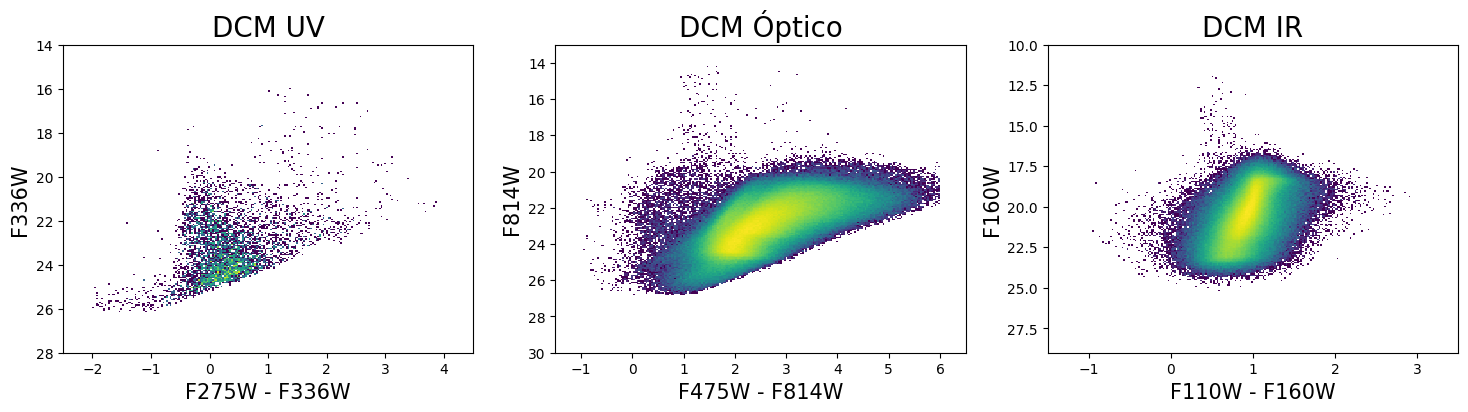

In [15]:
make_cmds(df_b1)

### Graficar una distribución espectral de energía (SED) de banda ancha de estrellas seleccionadas en el Bloque 1

Primero, definamos las longitudes de onda pivote para los filtros PHAT (de los __[Manuales de Instrumentos HST](https://hst-docs.stsci.edu/hom)__).

In [16]:
# Longitud de onda pivote en nm para cada filtro (F275W, F336W, F475W, F814W, F110W, F160W)
plambda = [270.97, 335.45, 474.44, 805.98, 1153.4, 1536.9]

Definir una función para seleccionar estrellas, en un Bloque dado, que tengan buena fotometría en las 6 bandas.

In [17]:
def good_stars(brick):
    stars_6b, = np.where((brick['f275w_vega'] < 30) & (brick['f336w_vega'] < 30) &
                         (brick['f475w_vega'] < 30) & (brick['f814w_vega'] < 30) & 
                         (brick['f110w_vega'] < 30) & (brick['f160w_vega'] < 30))
    print('¡Hay %d estrellas con buenas mediciones en las 6 bandas!' % (len(stars_6b)))
    
    return stars_6b

Definir una función para elegir tres estrellas aleatorias de la muestra con buena fotometría en 6 bandas, graficar sus SEDs de banda ancha e indicar sus posiciones en cada uno de los DCMs UV, óptico e IR.

In [18]:
def make_seds(brick, k=3):
    """
    brick: dataframe de Pandas para un Bloque PHAT dado
    k: número de estrellas aleatorias a seleccionar (por omisión=3)
    """
    
    fig, ax = plt.subplots(1, 1, figsize=(6,4))

    stars_6b = good_stars(brick)
    sIDs = random.choices(stars_6b, k=k)
    c = cycle(mcolors.TABLEAU_COLORS)  # Ciclo recurrente de colores definidos para gráficos
    for j,i in enumerate(sIDs):
        ax.plot(plambda, [brick['f275w_vega'][i], brick['f336w_vega'][i], 
                          brick['f475w_vega'][i], brick['f814w_vega'][i],
                          brick['f110w_vega'][i], brick['f160w_vega'][i]], marker='.', ls='-', c=next(c))
    ymin = np.min(brick.iloc[sIDs].values.ravel())
    ymax = np.max(brick.iloc[sIDs].values.ravel())
    ax.set_ylim(ymax+0.5, ymin-0.5)
    ax.set_xlabel(r'$\lambda$ [nm]',fontsize=15)
    ax.set_ylabel('Magnitud',fontsize=15)

    make_cmds(brick, starlist=sIDs)

    plt.show()

Elegir tres estrellas aleatorias de la muestra con buena fotometría en 6 bandas, graficar sus SEDs de banda ancha e indicar sus posiciones en cada DCM.

¡Hay 4909 estrellas con buenas mediciones en las 6 bandas!


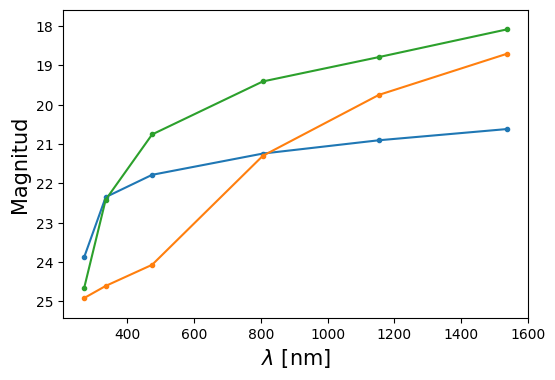

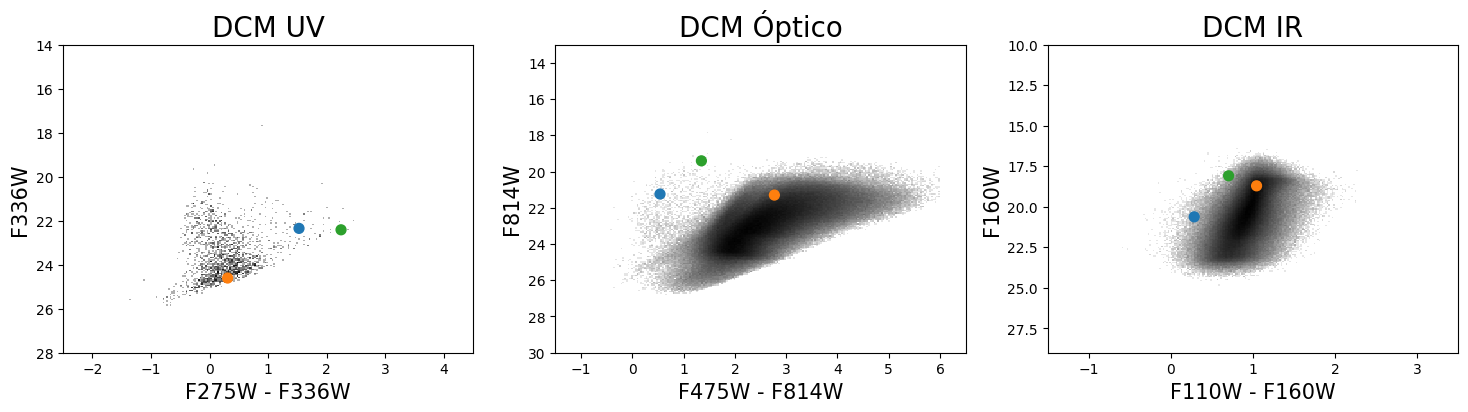

In [19]:
make_seds(df_b1, k=3)

## Hacer consulta para el Bloque 15 (región del anillo de formación estelar de 10 kpc)

El Bloque 15 cubre una porción del anillo de formación estelar de 10 kpc en el disco de M31. Esta región sufre menos del apelotonamiento estelar que el Bloque 1, y por lo tanto tiene DCMs más profundos. Sin embargo, la presencia de más polvo atenúa significativamente las estrellas, haciendo que las características del DCM sean más débiles y más anchas debido a la extinción y enrojecimiento por polvo. 

In [20]:
query = """SELECT f275w_vega, f336w_vega, f475w_vega, f814w_vega, f110w_vega, f160w_vega 
           FROM phat_v2.phot_mod
           WHERE f275w_gst=1 AND f336w_gst=1 AND 
                 f475w_gst=1 AND f814w_gst=1 AND 
                 f110w_gst=1 AND f160w_gst=1 AND
                 brick=15
          """

Guardar el resultado de la consulta como un dataframe de Pandas.

In [21]:
df_b15 = qc.query(sql=query, fmt='pandas')
print("Número de filas:", len(df_b15))

Número de filas: 658617


### Hacer DCMs UV, ópticos e IR para Bloque 15

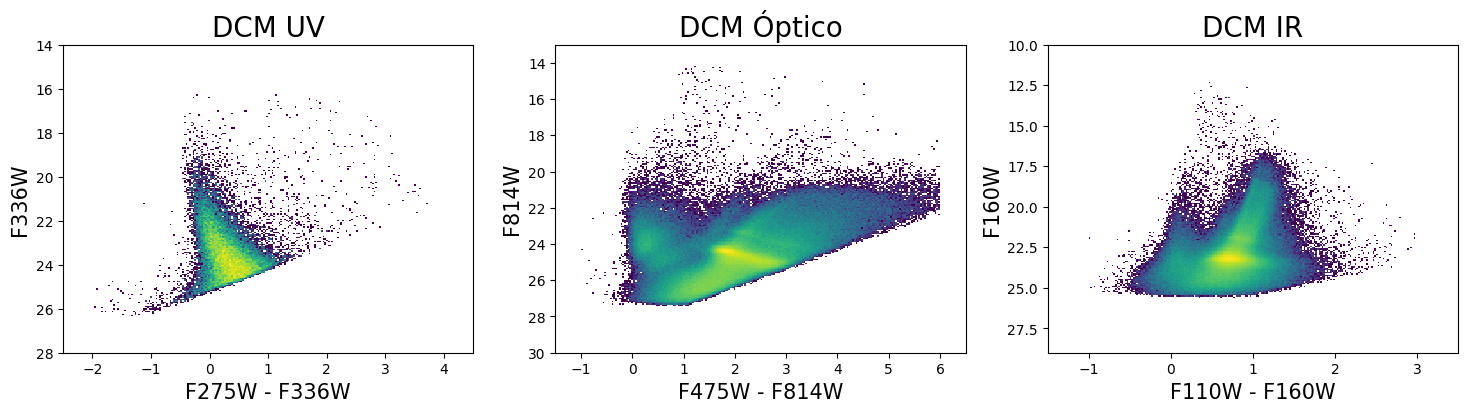

In [22]:
make_cmds(df_b15)

Elegir tres estrellas aleatorias de la muestra con buena fotometría en 6 bandas, graficar sus SEDs de banda ancha e indicar sus posiciones en cada DCM. 

¡Hay 31723 estrellas con buenas mediciones en las 6 bandas!


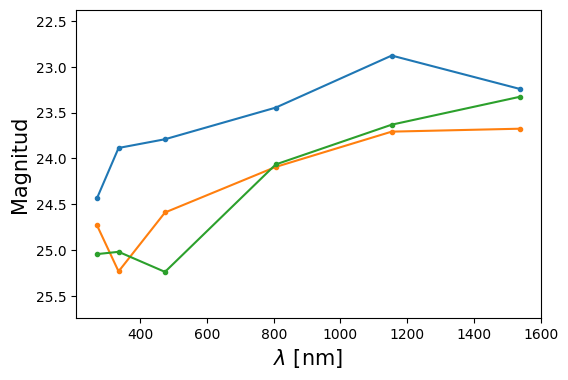

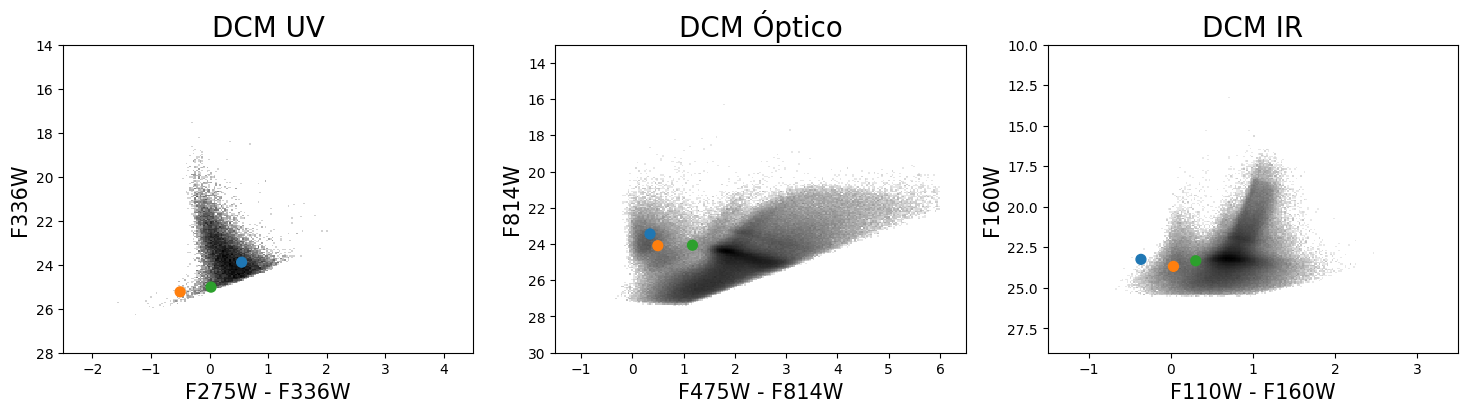

In [23]:
make_seds(df_b15, k=3)

## Hacer la consulta para Bloque 23 (región más externa de baja densidad)

El Bloque 23 cubre la parte más externa del disco formador de estrellas. Por lo tanto, se espera ver estrellas jóvenes de la MS prominentes. Además, se espera el menor efecto de aglomeración estelar y menos efecto del polvo comparado con los Bloques 1 y 15. Todo esto junto permite que el Bloque 23 logre los DCMs más profundos y nítidos dentro del área cubierta por PHAT. 

In [24]:
query = """SELECT f275w_vega, f336w_vega, f475w_vega, f814w_vega, f110w_vega, f160w_vega
           FROM phat_v2.phot_mod
           WHERE f275w_gst=1 AND f336w_gst=1 AND 
                 f475w_gst=1 AND f814w_gst=1 AND 
                 f110w_gst=1 AND f160w_gst=1 AND
                 brick=23
          """

Guardar el resultado de la consulta como un dataframe de Pandas.

In [25]:
df_b23 = qc.query(sql=query, fmt='pandas')
print("Número de filas:", len(df_b23))

Número de filas: 253181


### Hacer DCMs UV, ópticos e IR para Bloque 23

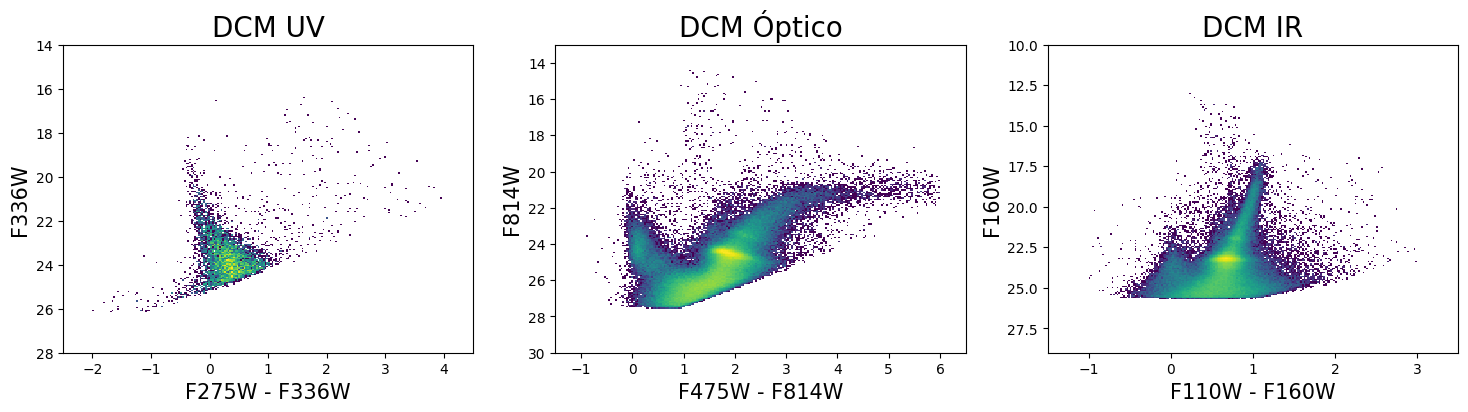

In [26]:
make_cmds(df_b23)

Elegir tres estrellas aleatorias de la muestra con buena fotometría en 6 bandas, graficar sus SEDs de banda ancha e indicar sus posiciones en cada DCM. 

¡Hay 6281 estrellas con buenas mediciones en las 6 bandas!


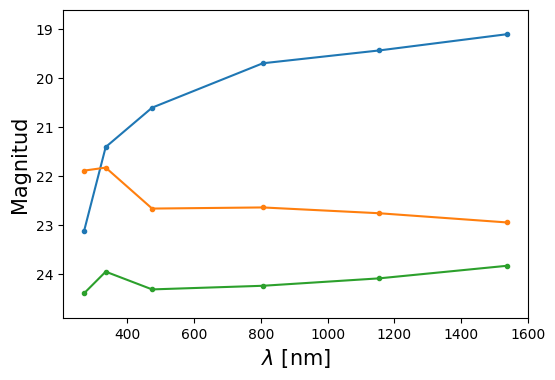

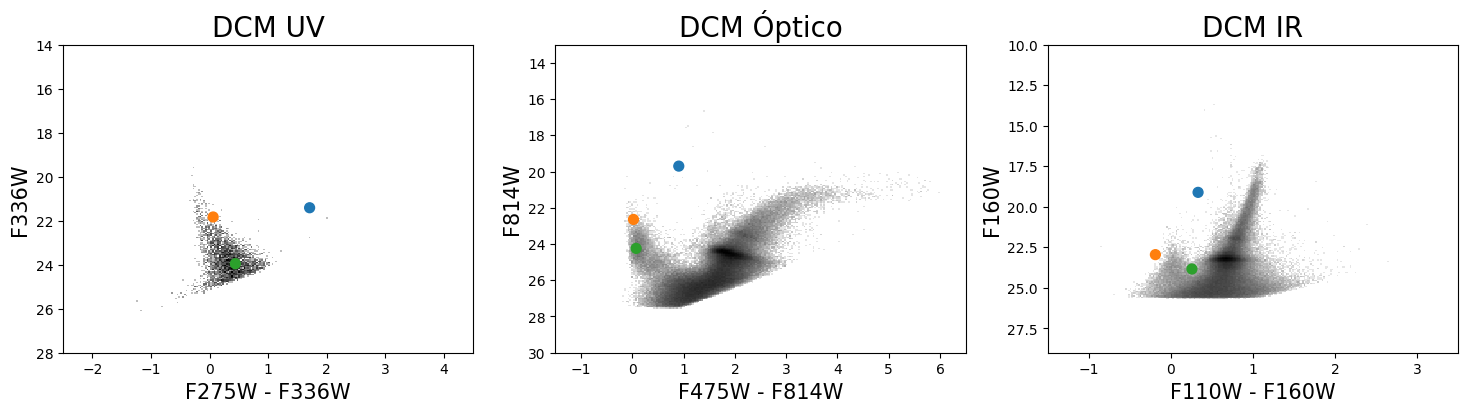

In [27]:
make_seds(df_b23, k=3)

<a class="anchor" id="resources"></a>
# Recursos y referencias
Dalcanton, J.J. et al. (2012, ApJS, 200, 18), "The Panchromatic Hubble Andromeda Treasury"
http://adsabs.harvard.edu/abs/2012ApJS..200...18D

Williams, B.F. et al. (2018, ApJS, 236, 4), "Reducing and Analyzing the PHAT Survey with the Cloud"
https://ui.adsabs.harvard.edu/abs/2018ApJS..236....4W

Williams, B.F. et al. (2023, ApJS, 268, 48), "The Panchromatic Hubble Andromeda Treasury XXI. The Legacy Resolved Stellar Photometry Catalog"
https://ui.adsabs.harvard.edu/abs/2023ApJS..268...48W